# Twitter Sentiment Analysis


Dataset: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

• Natural language processors (NLP) work by converting words (text) into numbers.

• These numbers are then used to train an Al/ML model to make predictions.

• Predictions could be sentiment inferred from social media posts and product reviews.

• Al/ML-based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not.

### Importing Libraries and Datasets

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
tweets_df = pd.read_csv('twitter.csv')

In [5]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
# Dropping the 'id' column from the DataFrame
tweets_df = tweets_df.drop(['id'], axis =1)

In [8]:
tweets_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


### Exploring the Dataset

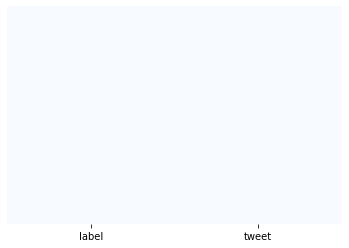

In [9]:
# Checking dataset for null values 
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");

Dataset does not contain null values

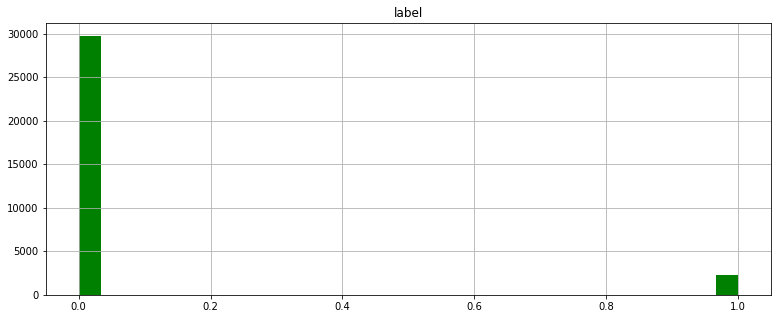

In [10]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'g');

The dataset is unbalanced (contains a large number of positive tweets (0.0) as compared to negative tweets)

In [11]:
# Obtaining the length of each tweet
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [12]:
tweets_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


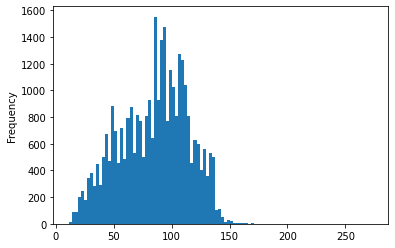

In [13]:
tweets_df['length'].plot(bins=100, kind = 'hist');

In [14]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [15]:
# View the shortest tweet
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

'i love you '

In [16]:
# Creating new dataframes for poitive and negative tweets
positive = tweets_df[tweets_df['label']==0]
negative = tweets_df[tweets_df['label']==1]

In [17]:
positive.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [18]:
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


### Creating Wordclouds

In [19]:
# Converting to list
positive_sentences = positive['tweet'].tolist()

In [22]:
print(len(positive_sentences))

29720


In [23]:
positive_sentences_as_one_string = " ".join(positive_sentences)

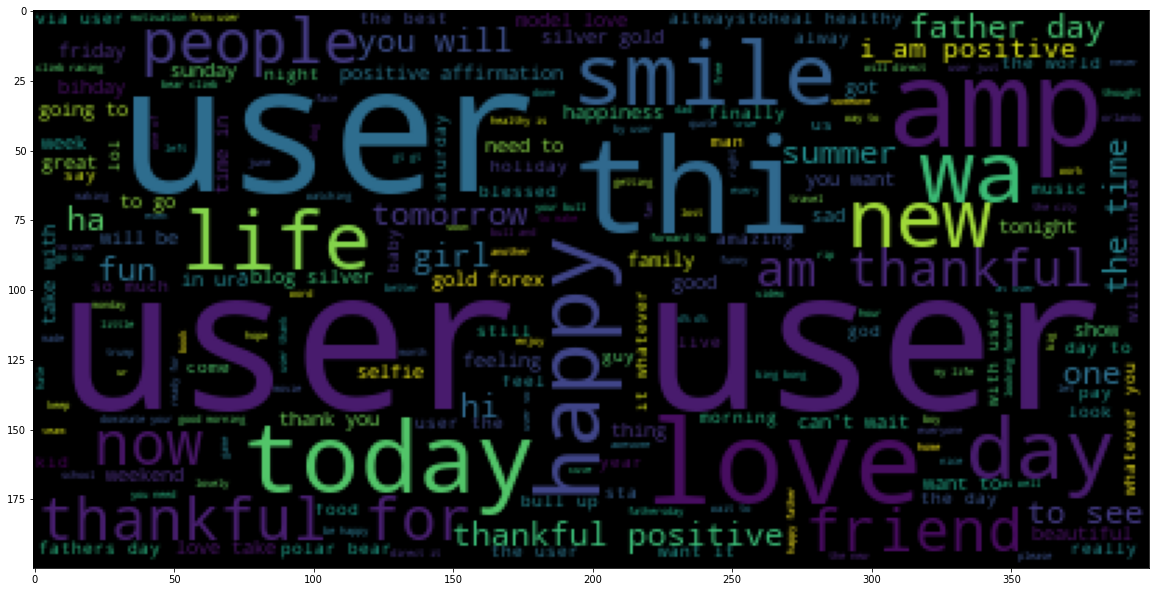

In [24]:
# Plotting Wordcloud for positive dataset
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string));

In [26]:
# Converting to list
negative_sentences = negative['tweet'].tolist()

In [27]:
print(len(negative_sentences))

2242


In [28]:
negative_sentences_as_one_string = " ".join(negative_sentences)

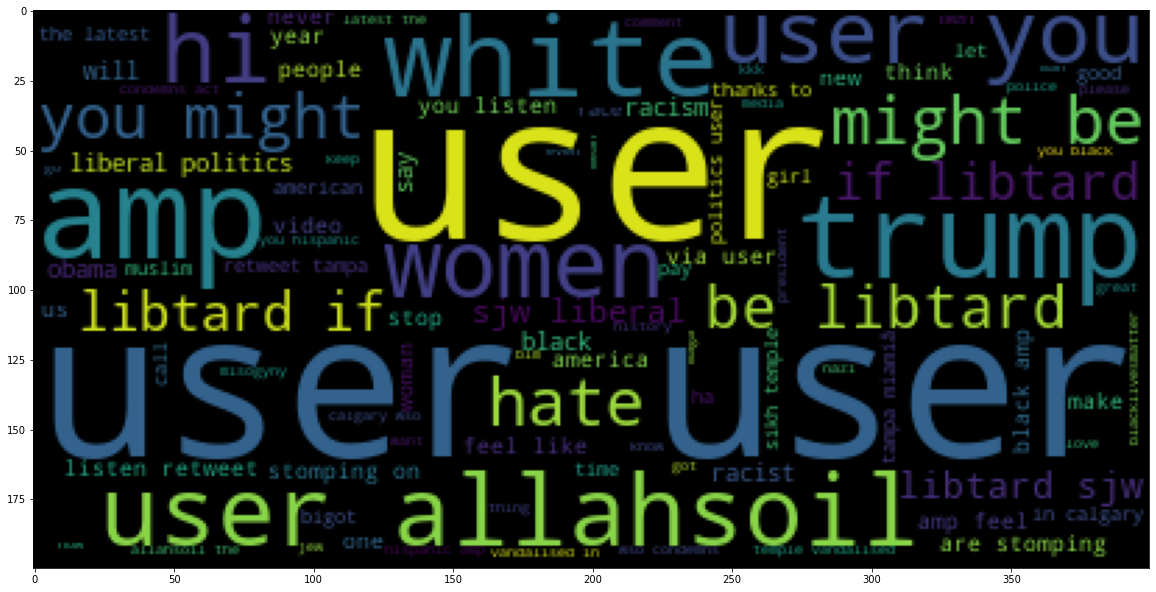

In [30]:
# Plotting Wordcloud for negative dataset
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string));

### Creating a Pipeline to remove punctuation, stopwords and perform Count Vectorization 

In [41]:
import string
string.punctuation

import nltk # Natural Language tool kit 
from nltk.corpus import stopwords
stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer

In [47]:
def tweet_cleaner(tweet):
    Test_punc_removed = [char for char in tweet if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [48]:
tweets_df_clean = tweets_df['tweet'].apply(tweet_cleaner)

In [49]:
print(tweets_df_clean[5]) #Cleaned Tweets

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = tweet_cleaner, dtype = 'uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [56]:
# print(vectorizer.get_feature_names())

In [57]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
tweets_countvectorizer.shape

(31962, 47386)

In [59]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [60]:
X = tweets


In [61]:
y = tweets_df['label']

### Training a Naive Bayes Classifier Model

In [62]:
X.shape

(31962, 47386)

In [63]:
y.shape

(31962,)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### Assessing Trained Model Performance

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

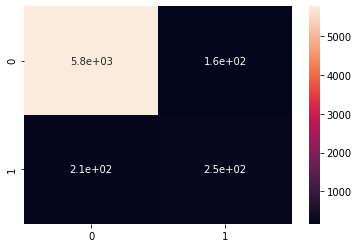

In [67]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [68]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5937
           1       0.60      0.54      0.57       456

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

